In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

In [18]:
ir = sns.load_dataset("iris")

In [19]:
iris = pd.DataFrame(ir)

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


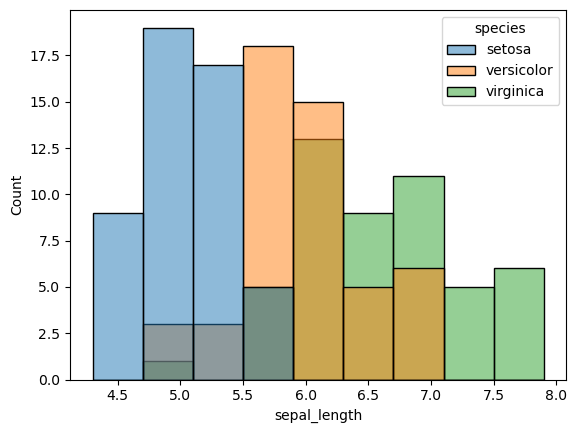

In [21]:
sns.histplot(x="sepal_length",hue="species",data=iris);

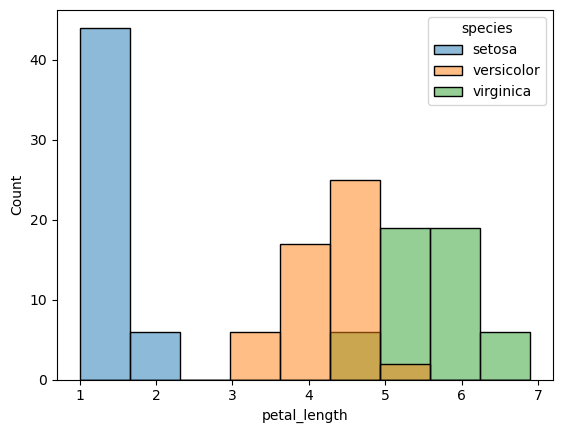

In [22]:
sns.histplot(x="petal_length",hue="species",data=iris);

In [23]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

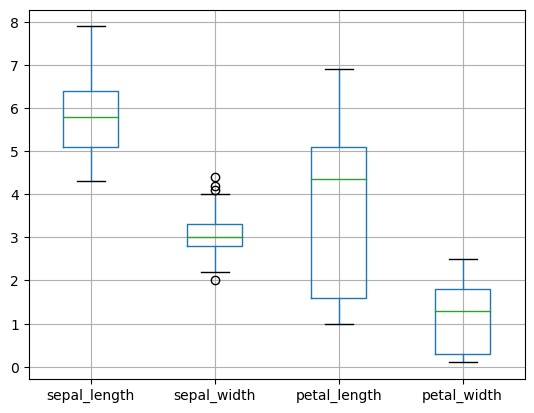

In [24]:
iris.boxplot();

In [66]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1

In [67]:
print(Q1)

sepal_length    5.1
sepal_width     2.8
petal_length    1.6
petal_width     0.3
Name: 0.25, dtype: float64


In [69]:
print(Q3)

sepal_length    6.4
sepal_width     3.3
petal_length    5.1
petal_width     1.8
Name: 0.75, dtype: float64


In [70]:
print(IQR)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64


In [74]:
outliers = (iris < (Q1 - 1.5 * IQR)) | (iris > (Q3 + 1.5 * IQR))

C:\Users\itsme\AppData\Local\Temp\ipykernel_1948\958644050.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (iris < (Q1 - 1.5 * IQR)) | (iris > (Q3 + 1.5 * IQR))


In [80]:
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

C:\Users\itsme\AppData\Local\Temp\ipykernel_1948\2188365520.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))


In [82]:
iris = iris[~outliers.any(axis=1)]

C:\Users\itsme\AppData\Local\Temp\ipykernel_1948\211554449.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  iris = iris[~outliers.any(axis=1)]


<AxesSubplot:>

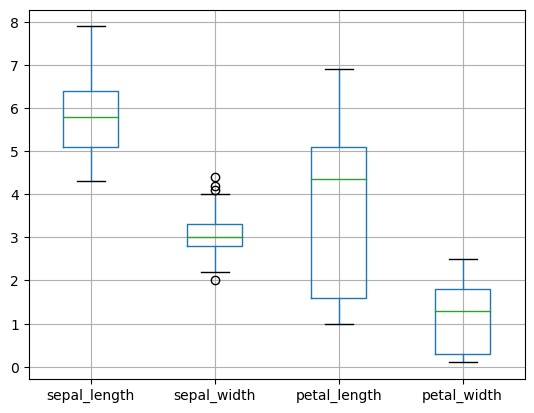

In [83]:
iris.boxplot()

In [85]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
lower_fence = Q1 - 3 * IQR
upper_fence = Q3 + 3 * IQR
outliers = (iris < lower_fence) | (iris > upper_fence)

# Remove the outliers
iris = iris[~outliers.any(axis=1)]

iris

C:\Users\itsme\AppData\Local\Temp\ipykernel_1948\3691620887.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (iris < lower_fence) | (iris > upper_fence)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<AxesSubplot:>

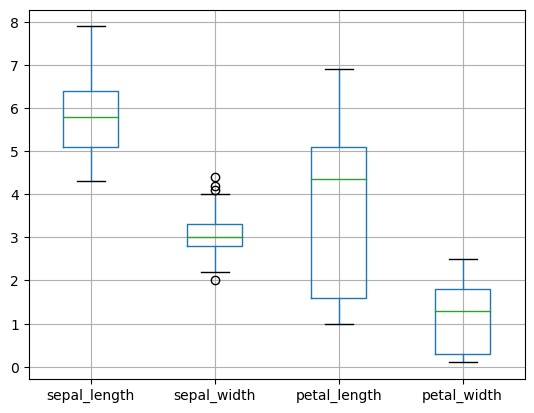

In [86]:
iris.boxplot()

In [93]:
# removing outliers

In [94]:
Q1 = np.percentile(iris["sepal_width"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(iris["sepal_width"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(iris["sepal_width"]>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(iris["sepal_width"]<=lower)

iris["sepal_width"].drop(upper_array[0],inplace=True)
iris["sepal_width"].drop(lower_array[0],inplace=True)

KeyError: '[False] not found in axis'

<AxesSubplot:>

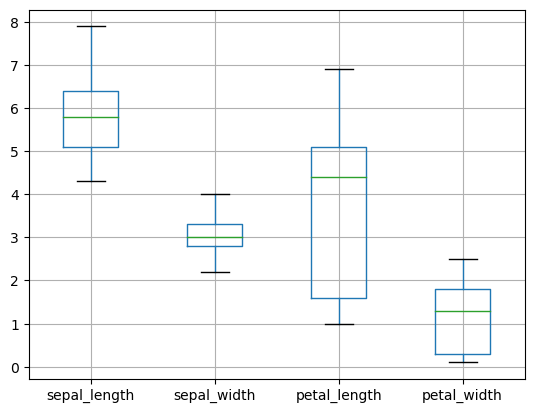

In [95]:
iris.boxplot()

In [101]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']

KeyError: "['Species'] not found in axis"

In [98]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# Creating a list of models to test
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# Evaluating each model's accuracy and selecting the best model
best_model = None
best_accuracy = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Printing the best model and its accuracy
print("Best Model: ", best_model)
print("Accuracy: ", best_accuracy)